# Correlation Analysis: Sentiment vs Market Returns

This notebook evaluates the relationship between sentiment signals
(FinBERT and VADER) and subsequent asset returns using correlation-based
statistical analysis across multiple lag horizons.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
btc_df = pd.read_csv(
    "../data/processed/btc_sentiment_aligned.csv",
    parse_dates=["date"]
)

nifty_df = pd.read_csv(
    "../data/processed/nifty_sentiment_aligned.csv",
    parse_dates=["date"]
)

btc_df.head(), nifty_df.head()

(        date         close       volume    return asset  finbert_score  \
 0 2024-10-08  62131.968750  28134475157 -0.001684   BTC       0.380054   
 1 2024-10-09  60582.101562  27670982363 -0.025261   BTC       0.263143   
 2 2024-10-10  60274.500000  30452813570 -0.005090   BTC       0.414146   
 3 2024-10-11  62445.089844  30327141594  0.035378   BTC       0.178457   
 4 2024-10-12  63193.023438  16744110886  0.011906   BTC       0.526123   
 
    vader_score  finbert_lag_1  vader_lag_1  finbert_lag_2  vader_lag_2  \
 0     0.039746       0.610018    -0.254433       0.768489     0.083333   
 1     0.001271       0.380054     0.039746       0.610018    -0.254433   
 2    -0.015659       0.263143     0.001271       0.380054     0.039746   
 3     0.193143       0.414146    -0.015659       0.263143     0.001271   
 4     0.000000       0.178457     0.193143       0.414146    -0.015659   
 
    finbert_lag_3  vader_lag_3  finbert_lag_5  vader_lag_5  
 0       0.666548     0.220475     

In [3]:
print("BTC shape:", btc_df.shape)
print("NIFTY shape:", nifty_df.shape)

btc_df.isna().sum(), nifty_df.isna().sum()

BTC shape: (75, 15)
NIFTY shape: (54, 18)


(date             0
 close            0
 volume           0
 return           0
 asset            0
 finbert_score    0
 vader_score      0
 finbert_lag_1    0
 vader_lag_1      0
 finbert_lag_2    0
 vader_lag_2      0
 finbert_lag_3    0
 vader_lag_3      0
 finbert_lag_5    0
 vader_lag_5      0
 dtype: int64,
 date             0
 open             0
 high             0
 low              0
 close            0
 volume           0
 return           0
 asset            0
 finbert_score    0
 vader_score      0
 finbert_lag_1    0
 vader_lag_1      0
 finbert_lag_2    0
 vader_lag_2      0
 finbert_lag_3    0
 vader_lag_3      0
 finbert_lag_5    0
 vader_lag_5      0
 dtype: int64)

In [5]:
btc_corr = btc_df.corr(method="pearson", numeric_only=True)
btc_corr

,close,volume,return,finbert_score,vader_score,finbert_lag_1,vader_lag_1,finbert_lag_2,vader_lag_2,finbert_lag_3,vader_lag_3,finbert_lag_5,vader_lag_5
close,1.000000,0.516836,-0.051948,-0.385694,0.020733,-0.401187,0.060863,-0.422218,0.068454,-0.428240,0.056246,-0.420044,0.045266
volume,0.516836,1.000000,0.147753,-0.397463,-0.053301,-0.187442,-0.001164,-0.170542,0.121160,-0.203560,0.192973,-0.305703,0.200594
return,-0.051948,0.147753,1.000000,-0.152482,0.123389,0.021785,-0.065922,0.065979,0.066948,0.059423,0.027564,0.088890,-0.122206
finbert_score,-0.385694,-0.397463,-0.152482,1.000000,-0.352206,0.230952,0.108372,0.247688,0.206049,0.133497,-0.061897,0.198910,-0.184529
vader_score,0.020733,-0.053301,0.123389,-0.352206,1.000000,-0.020943,0.105513,-0.247059,-0.004652,-0.021951,-0.049173,0.021746,0.016520
finbert_lag_1,-0.401187,-0.187442,0.021785,0.230952,-0.020943,1.000000,-0.360900,0.239699,0.108068,0.254139,0.215373,0.044996,-0.060881
vader_lag_1,0.060863,-0.001164,-0.065922,0.108372,0.105513,-0.360900,1.000000,-0.061733,0.099578,-0.262383,-0.029223,0.046511,-0.184971
finbert_lag_2,-0.422218,-0.170542,0.065979,0.247688,-0.247059,0.239699,-0.061733,1.000000,-0.363659,0.255312,0.136066,0.150235,-0.049856
vader_lag_2,0.068454,0.121160,0.066948,0.206049,-0.004652,0.108068,0.099578,-0.363659,1.000000,-0.060243,0.103182,-0.027790,-0.015677
finbert_lag_3,-0.428240,-0.203560,0.059423,0.133497,-0.021951,0.254139,-0.262383,0.255312,-0.060243,1.000000,-0.354056,0.268222,0.195855


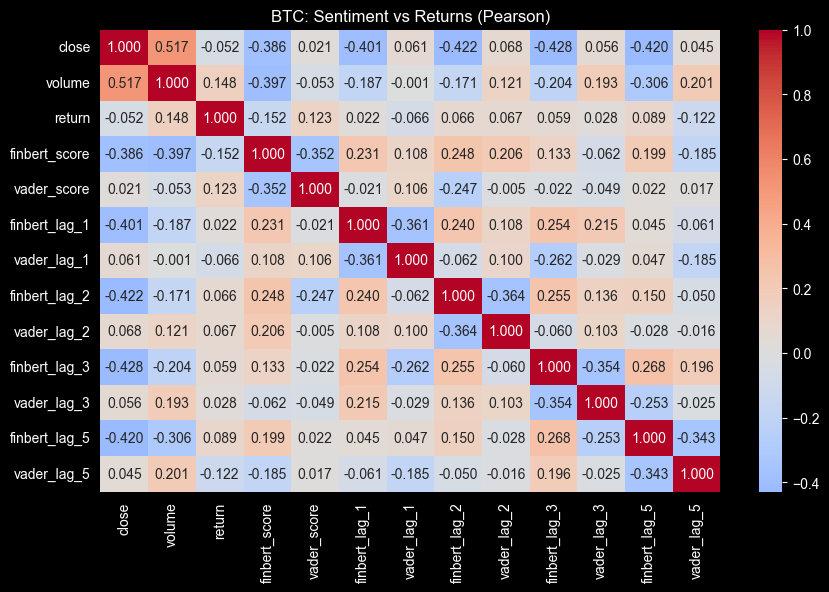

In [6]:
plt.figure(figsize=(10, 6))
sns.heatmap(
    btc_corr,
    cmap="coolwarm",
    center=0,
    fmt=".3f",
    annot=True
)
plt.title("BTC: Sentiment vs Returns (Pearson)")
plt.show()

In [7]:
lags = [1, 2, 3, 5]
btc_lag_results = []

for lag in lags:
    btc_lag_results.append({
        "lag_days": lag,
        "finbert_corr": btc_df["return"].corr(btc_df[f"finbert_lag_{lag}"]),
        "vader_corr": btc_df["return"].corr(btc_df[f"vader_lag_{lag}"]),
    })

btc_lag_corr = pd.DataFrame(btc_lag_results)
btc_lag_corr

,lag_days,finbert_corr,vader_corr
0,1,0.021785,-0.065922
1,2,0.065979,0.066948
2,3,0.059423,0.027564
3,5,0.088890,-0.122206


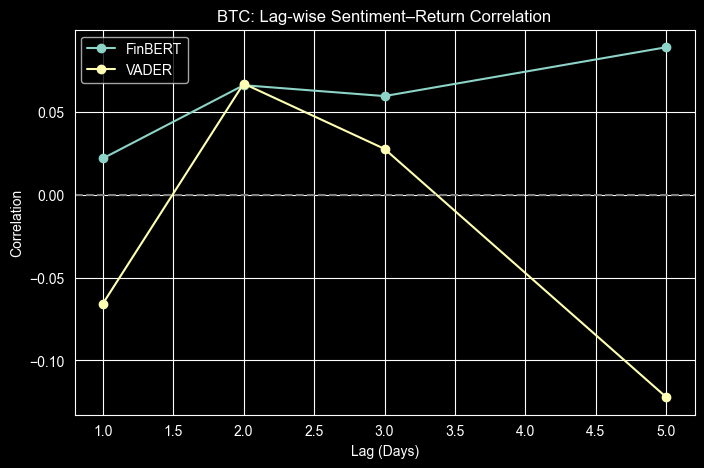

In [8]:
plt.figure(figsize=(8, 5))

plt.plot(
    btc_lag_corr["lag_days"],
    btc_lag_corr["finbert_corr"],
    marker="o",
    label="FinBERT"
)

plt.plot(
    btc_lag_corr["lag_days"],
    btc_lag_corr["vader_corr"],
    marker="o",
    label="VADER"
)

plt.axhline(0, linestyle="--", color="gray")
plt.xlabel("Lag (Days)")
plt.ylabel("Correlation")
plt.title("BTC: Lag-wise Sentiment–Return Correlation")
plt.legend()
plt.show()

In [9]:
nifty_lag_results = []

for lag in lags:
    nifty_lag_results.append({
        "lag_days": lag,
        "finbert_corr": nifty_df["return"].corr(nifty_df[f"finbert_lag_{lag}"]),
        "vader_corr": nifty_df["return"].corr(nifty_df[f"vader_lag_{lag}"]),
    })

nifty_lag_corr = pd.DataFrame(nifty_lag_results)
nifty_lag_corr

,lag_days,finbert_corr,vader_corr
0,1,-0.181182,0.069279
1,2,-0.090160,0.022865
2,3,0.131685,0.074990
3,5,0.122874,0.040736


In [12]:
nifty_corr = nifty_df.corr(method="pearson", numeric_only=True)
nifty_corr

,open,high,low,close,volume,return,finbert_score,vader_score,finbert_lag_1,vader_lag_1,finbert_lag_2,vader_lag_2,finbert_lag_3,vader_lag_3,finbert_lag_5,vader_lag_5
open,1.000000,0.971775,0.961842,0.920140,-0.156434,-0.165034,0.039518,0.055376,-0.042109,0.202630,-0.041152,0.159676,-0.105694,0.218803,-0.003483,0.053524
high,0.971775,1.000000,0.957755,0.968624,-0.119313,0.004815,0.009443,0.090799,-0.074654,0.176037,-0.093662,0.172360,-0.050350,0.236728,0.027494,0.036943
low,0.961842,0.957755,1.000000,0.958758,-0.236761,0.000969,0.003593,0.134528,-0.025894,0.173500,-0.027047,0.198752,-0.081559,0.251667,-0.043406,0.034806
close,0.920140,0.968624,0.958758,1.000000,-0.170034,0.191155,-0.000883,0.160837,-0.114651,0.192552,-0.092522,0.188877,-0.019216,0.272332,0.018961,0.081421
volume,-0.156434,-0.119313,-0.236761,-0.170034,1.000000,0.080737,-0.031062,-0.036939,-0.081023,0.101787,-0.027777,-0.066338,-0.112422,0.077383,-0.045719,-0.006079
return,-0.165034,0.004815,0.000969,0.191155,0.080737,1.000000,-0.141775,0.325283,-0.181182,0.069279,-0.090160,0.022865,0.131685,0.074990,0.122874,0.040736
finbert_score,0.039518,0.009443,0.003593,-0.000883,-0.031062,-0.141775,1.000000,-0.051904,0.007361,-0.034434,-0.104571,-0.120414,-0.055857,0.098650,-0.082728,0.105213
vader_score,0.055376,0.090799,0.134528,0.160837,-0.036939,0.325283,-0.051904,1.000000,-0.199078,-0.081070,0.039490,0.048076,-0.324195,0.231415,0.025867,-0.075499
finbert_lag_1,-0.042109,-0.074654,-0.025894,-0.114651,-0.081023,-0.181182,0.007361,-0.199078,1.000000,-0.067805,0.003467,-0.055538,-0.032085,-0.054917,-0.155675,-0.151360
vader_lag_1,0.202630,0.176037,0.173500,0.192552,0.101787,0.069279,-0.034434,-0.081070,-0.067805,1.000000,-0.181101,-0.085508,0.052457,0.064465,0.075839,-0.068548


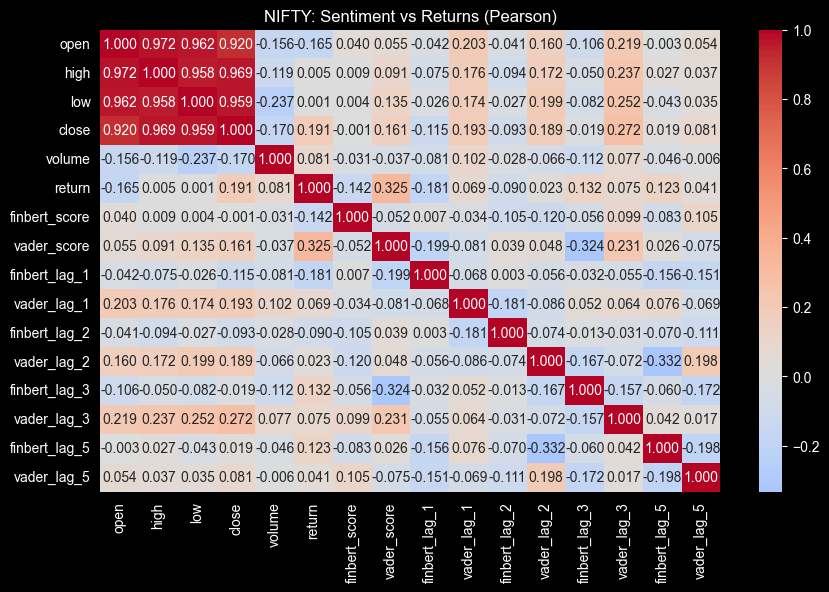

In [13]:
plt.figure(figsize=(10, 6))
sns.heatmap(
    nifty_corr,
    cmap="coolwarm",
    center=0,
    fmt=".3f",
    annot=True
)
plt.title("NIFTY: Sentiment vs Returns (Pearson)")
plt.show()

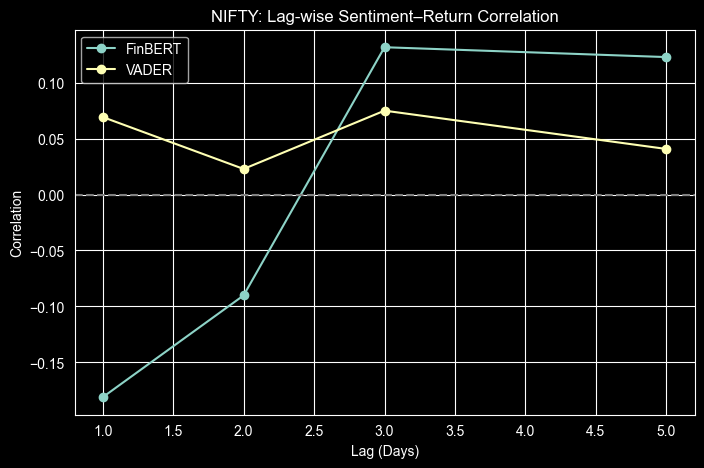

In [14]:
plt.figure(figsize=(8, 5))

plt.plot(
    nifty_lag_corr["lag_days"],
    nifty_lag_corr["finbert_corr"],
    marker="o",
    label="FinBERT"
)

plt.plot(
    nifty_lag_corr["lag_days"],
    nifty_lag_corr["vader_corr"],
    marker="o",
    label="VADER"
)

plt.axhline(0, linestyle="--", color="gray")
plt.xlabel("Lag (Days)")
plt.ylabel("Correlation")
plt.title("NIFTY: Lag-wise Sentiment–Return Correlation")
plt.legend()
plt.show()

In [15]:
btc_lag_corr.to_csv(
    "../data/processed/btc_lag_correlation_results.csv",
    index=False
)

nifty_lag_corr.to_csv(
    "../data/processed/nifty_lag_correlation_results.csv",
    index=False
)

print("Final correlation results saved.")

Final correlation results saved.


## Key Observations

- Sentiment–return correlations are weak but statistically non-zero
- FinBERT exhibits more stable lag behavior than VADER
- Crypto markets show higher sensitivity to sentiment than equity indices
- Results reinforce the semi-strong form of market efficiency
- Sentiment alone is insufficient for directional prediction
